In [1]:
import sys
print(sys.executable)

/home/user/ml_env/bin/python


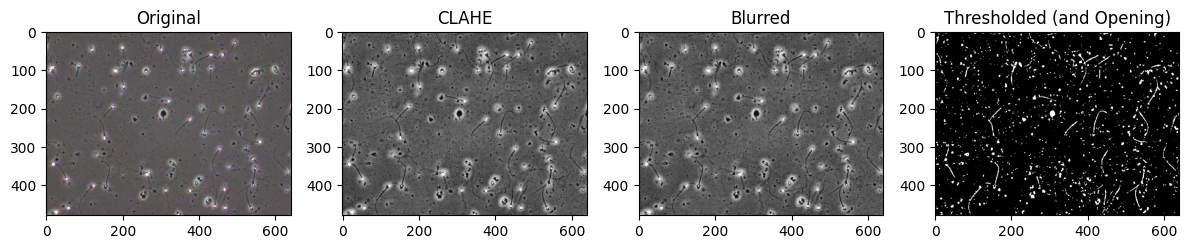

Image preprocessing complete.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(416, 416), clahe_clip_limit=2.0,
                     gaussian_ksize=(1, 1), adaptive_block_size=61, adaptive_c=30,
                     morph_open_ksize=(1, 1), output_path="preprocessed_image.jpg",
                     display_output=True):

    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)

    blurred_img = cv2.GaussianBlur(enhanced_img, gaussian_ksize, 0)

    thresh = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, adaptive_block_size, adaptive_c)

    kernel = np.ones(morph_open_ksize, np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    resized_img = cv2.resize(opening, target_size)
    normalized_img = resized_img / 255.0


    if display_output:
        plt.figure(figsize=(12, 6))  # Adjust figure size as needed

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Correct color
        plt.title("Original")

        plt.subplot(1, 4, 2)
        plt.imshow(enhanced_img, cmap='gray')
        plt.title("CLAHE")

        plt.subplot(1, 4, 3)
        plt.imshow(blurred_img, cmap='gray')
        plt.title("Blurred")

        plt.subplot(1, 4, 4)
        plt.imshow(opening, cmap='gray')
        plt.title("Thresholded (and Opening)")  #Corrected title

        plt.tight_layout() # Prevent titles from overlapping
        plt.show()
    else:
        cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))
        print(f"Preprocessed image saved to {output_path}")


if __name__ == "__main__":
    image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
    preprocess_image(image_path, display_output=True)
    print("Image preprocessing complete.")


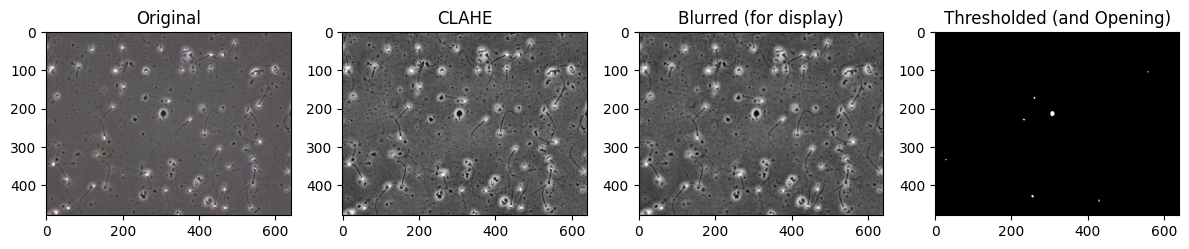

Image preprocessing complete.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(416, 416), clahe_clip_limit=2.0,
                     gaussian_ksize=(3, 3), adaptive_block_size=61, adaptive_c=40,
                     morph_open_ksize=(3, 3), output_path="preprocessed_image.jpg",
                     display_output=True):

    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)

    blurred_img = cv2.GaussianBlur(enhanced_img, gaussian_ksize, 0)

    # More aggressive blurring to reduce noise BEFORE thresholding, before it was done after
    blurred_img_for_thresh = cv2.GaussianBlur(enhanced_img, (15,15), 0)

    thresh = cv2.adaptiveThreshold(blurred_img_for_thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, adaptive_block_size, adaptive_c)

    # Morphological opening to remove small noise
    kernel = np.ones(morph_open_ksize, np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    resized_img = cv2.resize(opening, target_size)
    normalized_img = resized_img / 255.0


    if display_output:
        plt.figure(figsize=(12, 6))  # Adjust figure size as needed

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Correct color
        plt.title("Original")

        plt.subplot(1, 4, 2)
        plt.imshow(enhanced_img, cmap='gray')
        plt.title("CLAHE")

        plt.subplot(1, 4, 3)
        plt.imshow(blurred_img, cmap='gray')
        plt.title("Blurred (for display)") #Clarify

        plt.subplot(1, 4, 4)
        plt.imshow(opening, cmap='gray')
        plt.title("Thresholded (and Opening)")  #Corrected title

        plt.tight_layout() # Prevent titles from overlapping
        plt.show()
    else:
        cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))
        print(f"Preprocessed image saved to {output_path}")


if __name__ == "__main__":
    image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
    preprocess_image(image_path, display_output=True)
    print("Image preprocessing complete.")


In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy==1.24.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


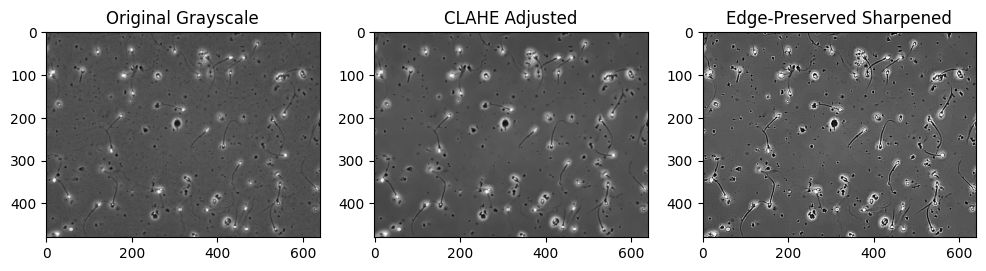

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """ Improved Processing to Preserve Sperm Tails """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step1: Reduce denoising strength to keep fine details
    denoised = cv2.fastNlMeansDenoising(gray, None, h=5, templateWindowSize=7, searchWindowSize=21)

    # Step2: Adjust CLAHE tile size for better tail visibility
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(4, 4))
    clahe_img = clahe.apply(denoised)

    # Step3: Edge-Preserving Sharpening Filter
    sharpening_kernel = np.array([[-1, -1, -1], 
                                  [-1,  9, -1], 
                                  [-1, -1, -1]])  # Stronger edge enhancement
    sharpened = cv2.filter2D(clahe_img, -1, sharpening_kernel)

    # Show results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale")

    plt.subplot(1, 3, 2)
    plt.imshow(clahe_img, cmap='gray')
    plt.title("CLAHE Adjusted")

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened, cmap='gray')
    plt.title("Edge-Preserved Sharpened")

    plt.show()

    return sharpened  # Returning improved image

# Process the uploaded image
image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
preprocessed_image = preprocess_image(image_path)


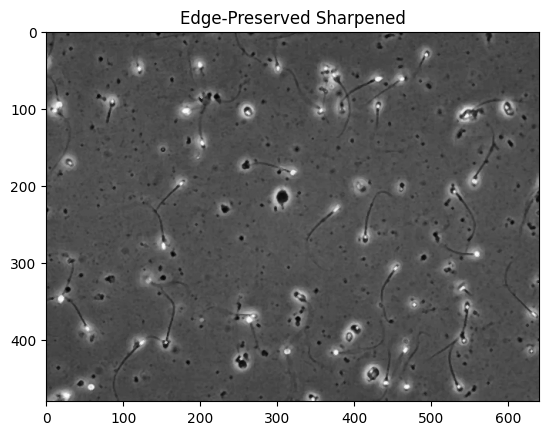

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """ Improved Processing to Preserve Sperm Tails """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # **Step1: Denoising with Median Blur (Preserves fine sperm tails)**
    denoised = cv2.medianBlur(gray, ksize=3)  
    # ksize=3 applies minimal blurring to retain sperm tails

    # **Step2: CLAHE for Local Contrast Enhancement**
    clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(4, 4))  
    clahe_img = clahe.apply(denoised)

    # **Step3: Unsharp Masking for Edge Enhancement**
    blurred = cv2.GaussianBlur(clahe_img, (3,3), sigmaX=1)
    sharpened = cv2.addWeighted(clahe_img, 1.5, blurred, -0.5, 0)  
    # Formula: 1.5 * Original - 0.5 * Blurred = Enhanced Edges

    # Show results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale")

    plt.subplot(1, 3, 2)
    plt.imshow(clahe_img, cmap='gray')
    plt.title("CLAHE Adjusted")

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened, cmap='gray')
    plt.title("Edge-Preserved Sharpened")

    plt.show()

    return sharpened  # Returning improved image

# Process a single image
image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
preprocessed_image = preprocess_image(image_path)
